This is my first machine learning project, done by reading the Book [HandsOn Machine Learning with Scikit-Learn and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291). In this notebook, we talked about Data Cleaning, Data Visualisation, Feature Engineering, Transformation Pipelines, Cross Validation, Model training, RandomForest, Decision Tree, Linear Regression, Grid Search, Random Search and Model Evaluation. That's a lot of topics, but they're all needed in this end to end Machine Learning Project. I recommend reading the book if you're don't understand a part of this notebook.


# Contents

1. [Getting and loading the Data](#1.-Getting-and-loading-the-Data)
   * [1.1 Taking a quick look at the data structure](#1.1-Taking-a-quick-look-at-the-data-structure)
   * [1.2 Creating a test set](#1.2-Creating-a-test-set)
   
2. [Discover and Visualize the Data to Gain Insights](#2.-Discover-and-Visualize-the-Data-to-Gain-Insights)
   * [2.1 Visualizing Geographical Data](#2.1-Visualizing-Geographical-Data)
   * [2.2 Looking for Correlations](#2.2-Looking-for-Correlations)
   * [2.3 Experimenting with attributes Combination](#2.3-Experimenting-with-attributes-Combination)
3. [Prepare the Data for Machine Learning Algorithms](#3.-Prepare-the-Data-for-Machine-Learning-Algorithms)
   * [3.1 Data Cleaning](#3.1-Data-Cleaning)
   * [3.2 Transformation Pipelines](#3.2-Transformation-Pipelines)
4. [Select and train a Model](#4.-Select-and-train-a-Model)
   * [4.1. Training and Evaluating on the training set](#4.1.-Training-and-Evaluating-on-the-training-set)
   * [4.2 Better Evaluation using Cross-Validation](#4.2-Better-Evaluation-using-Cross-Validation)
5. [Fine tune your model](#5.-Fine-tune-your-model)
   * [5.1. Grid Search](#5.1.-Grid-Search)
   * [5.2. Randomized Search](#5.2.-Randomized-Search)
   * [5.3. Analyze the Best Models and Their Errors](#5.3.-Analyze-the-Best-Models-and-Their-Errors)
   * [5.4. Evaluate your system on the test set](#5.4.-Evaluate-your-system-on-the-test-set)

# Setup

In [2]:
# Common imports
import numpy as np
import os

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# [1. Getting and loading the Data](#Contents)

In [4]:
import pandas as pd 
housing =  pd.read_csv('housing.csv')

## [1.1 Taking a quick look at the data structure](#Contents)

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We have missing values in the total_bedooms column

In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


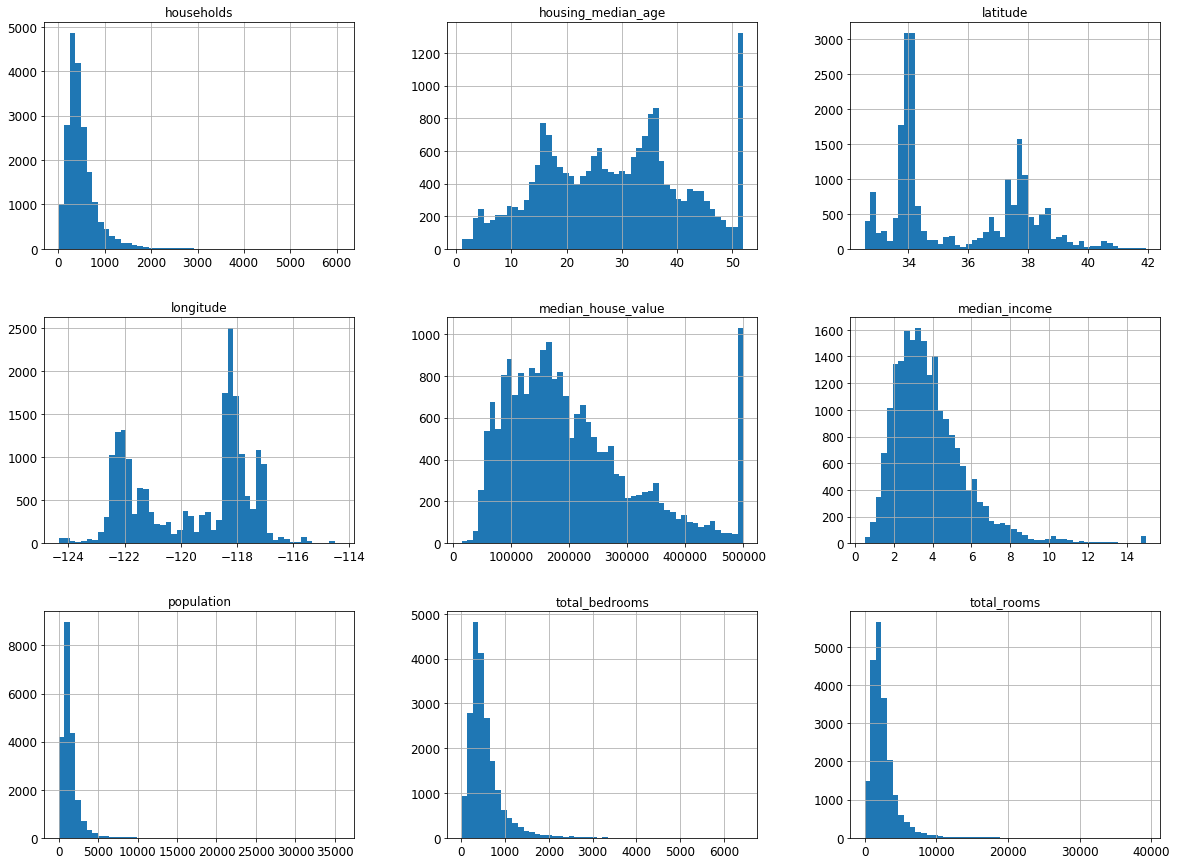

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins= 50, figsize=(20,15))
plt.show()

**Few things to notice here**

* The median income has been scaled and capped at 15 (actually 15.0001) for higher median
incomes, and at 0.5 (actually 0.4999) for lower median incomes.

* The housing median age and the median house value were also capped.

* This values don't have the same scale

## [1.2 Creating a test set](#Contents)

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [11]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


This is a good solution to separate our data in training and test set, but there is a risk of a significant sampling bias.
Let's say that the median_income category is a very
important attribute to predict median housing prices. We may want to ensure that
the test set is representative of the various categories of incomes in the whole dataset.
Since the median income is a continuous numerical attribute, we first need to create
an income category attribute. Let’s look at the median income histogram more closely

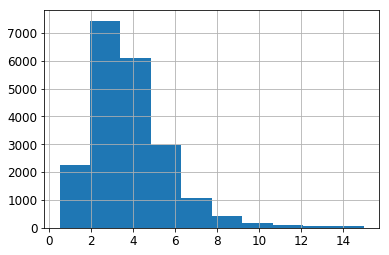

In [12]:
housing['median_income'].hist()

Most median income values are clustered around 2–5 (tens of thousands of dollars),
but some median incomes go far beyond 6. It is important to have a sufficient number of instances in our dataset for each stratum, or else the estimate of the stratum’s
importance may be biased. This means that we should not have too many strata, and
each stratum should be large enough.

The following code creates an income category
attribute by dividing the median income by 1.5 (to limit the number of income categories),
and rounding up using ceil (to have discrete categories), and then merging
all the categories greater than 5 into category 5:

In [13]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

In [14]:
housing['income_cat'].where(housing['income_cat'] < 5 ,other = 5.0, inplace = True)

In [15]:
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

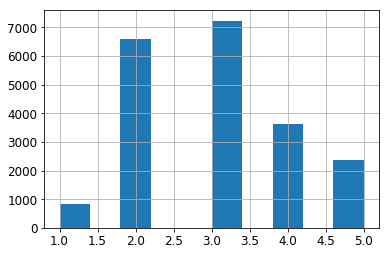

In [16]:
housing['income_cat'].hist()

Now we are ready to do stratified sampling based on the income category. For this
you can use Scikit-Learn’s StratifiedShuffleSplit class

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

Let’s see if this worked as expected. We can start by looking at the income category
proportions in the full housing dataset:

In [18]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [19]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

we can see that we have the same proportion of income category in the stratified test set. Let's compare it to what we could have had without stratifying

In [20]:
def income_cat_proportion(data):
    return data['income_cat'].value_counts()/len(data)

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall":income_cat_proportion(housing),
    "Stratified": income_cat_proportion(strat_test_set),
    "Random": income_cat_proportion(test_set)
}).sort_index()


In [21]:
compare_props

,Overall,Random,Stratified
1.0,0.039826,0.040213,0.039729
2.0,0.318847,0.324370,0.318798
3.0,0.350581,0.358527,0.350533
4.0,0.176308,0.167393,0.176357
5.0,0.114438,0.109496,0.114583


In [22]:
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [23]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


Removing the income_cat column from the strat_test and strat_train set

In [24]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis='columns', inplace = True)


In [25]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

# [2. Discover and Visualize the Data to Gain Insights](#Contents)

From now on, we'll only work with the training set. Let's a create a copy so we can play with it without harming the training_set

In [26]:
housing = strat_train_set.copy()

## [2.1 Visualizing Geographical Data](#Contents)

Since there is geographical information (latitude and longitude), it is a good idea to
create a scatterplot of all districts to visualize the data

Text(0.5,1,'A geographical scatter plot of the data')

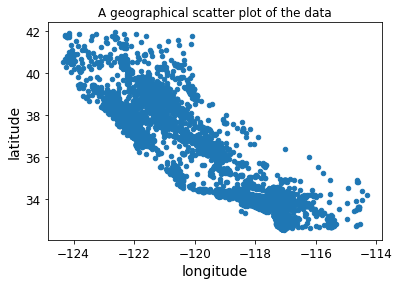

In [27]:
housing.plot(kind='scatter', x= 'longitude', y='latitude')
plt.title('A geographical scatter plot of the data')

We cannot really see the places where there is a high density of points.Let's change that

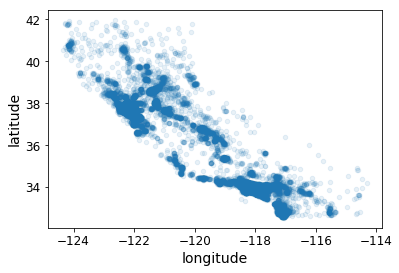

In [28]:
housing.plot(kind='scatter', x= 'longitude', y='latitude', alpha = 0.1)

Now let’s look at the housing prices. The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices)

The argument sharex=False fixes a display bug (the x-axis values and legend were not displayed

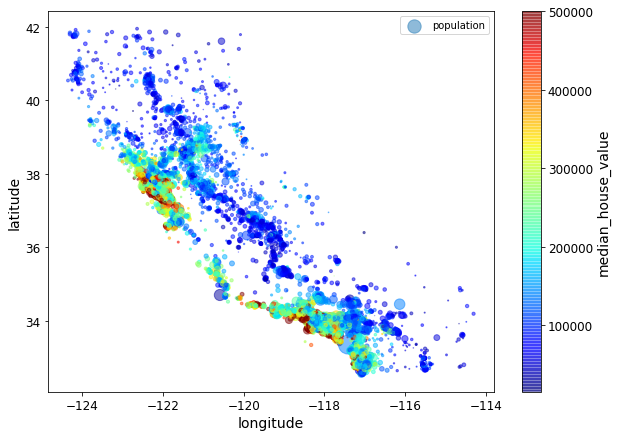

In [29]:
housing.plot(kind='scatter', x='longitude', y = 'latitude', alpha = 0.5,
            s =housing['population']/100,label= 'population', c = "median_house_value", cmap = plt.get_cmap('jet'),
            colorbar=True, sharex=False, figsize=(10,7))
plt.legend()

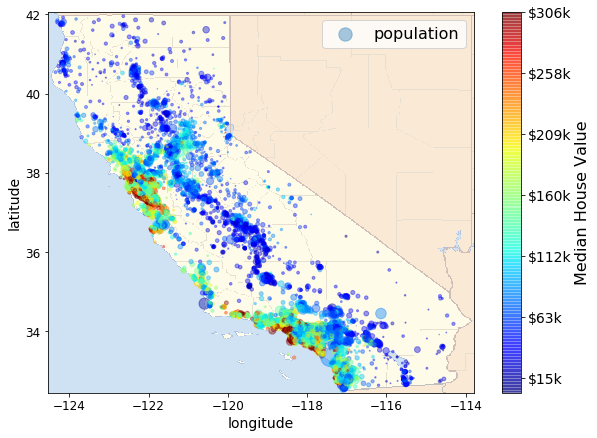

In [30]:
import matplotlib.image as mpimg
california_img = mpimg.imread('california.png')
ax = housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', figsize = (10,7),
                 s = housing['population']/100, label = 'population', c = 'median_house_value',
                 cmap = plt.get_cmap('jet'), colorbar = False, alpha = 0.4)
plt.imshow(california_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5, cmap = plt.get_cmap('jet') )
plt.ylabel('latitude', fontsize = 14)
plt.xlabel('longitude', fontsize = 14)
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.savefig("california_housing_prices_plot")
plt.show()

This image tells us that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density, as we  knew already.
It will probably be useful to use a clustering algorithm to detect the main clusters, and
add new features that measure the proximity to the cluster centers. The ocean proximity
attribute may be useful as well, although in Northern California the housing
prices in coastal districts are not too high, so it is not a simple rule.

## [2.2 Looking for Correlations](#Contents)

Let's look at how much each attribute correlate to the **median house value**:

In [31]:
corr_matrix = housing.corr()

In [32]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Here we can see a correlation between the **median income** and the *median house value*. When the first goes up, the latter goes up to. We can also see a small negative correlation between the **latitude** and the *median house value*. That's mean prices have a slight tendancy to go down when we go north (higher latitude).

The correlation coefficient might still miss out on some correlation in the dataset as it only measures linear correlation.
Another way to check correlation between attributes is to use pandas scatter_matrix function which plots every numerical attribute against every other numerical attribute.

Since they are the most correlated to the median house value, let's only focus on the *median_income, total_rooms* and *housing_median_age*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253C2069208>,
      dtype=object)

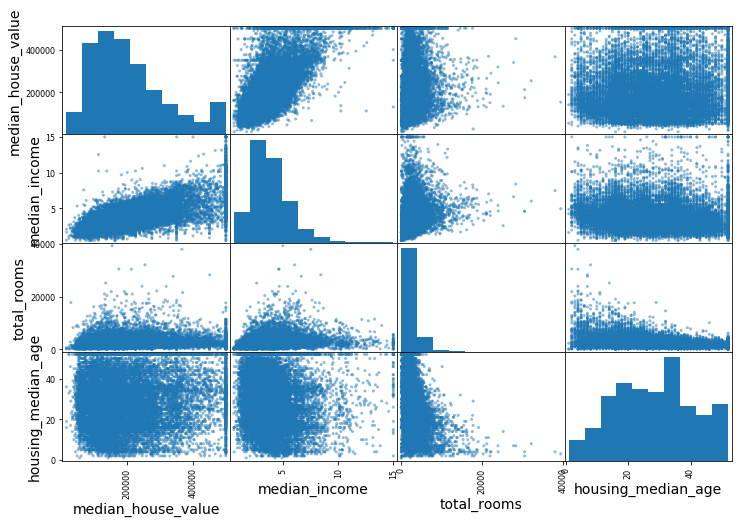

In [33]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

The most promising attribute to predict the median house value is the median income. Let's zoom on their correlation scatterplot

Text(0.5,1,'median income vs median house value')

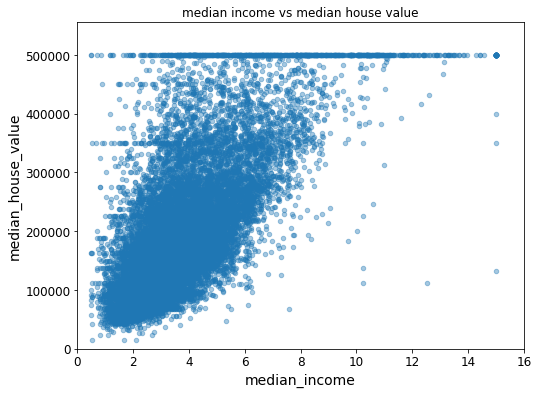

In [34]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha =0.4, figsize = (8,6))
plt.axis([0,16,0,555000])
plt.title('median income vs median house value')

This plot reveals a few things. First, the correlation is indeed very strong; we can
clearly see the upward trend and the points are not too dispersed. Second, the price
cap that we noticed earlier is clearly visible as a horizontal line at  500,000. But this
plot reveals other less obvious straight lines: a horizontal line around $450,000,
another around  350,000, perhaps one around 280,000, and a few more below that.
We may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks.

## [2.3 Experimenting with attributes Combination](#Contents)

the
total number of rooms in a district is not very useful if we don’t know how many
households there are. What we really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: we 
want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. Let’s create these new
attributes:

In [35]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/ housing['total_rooms']
housing['populations_per_household'] = housing['population']/housing['households']

Now, let's look at the correlation matrix again

In [36]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value           1.000000
median_income                0.687160
rooms_per_household          0.146285
total_rooms                  0.135097
housing_median_age           0.114110
households                   0.064506
total_bedrooms               0.047689
populations_per_household   -0.021985
population                  -0.026920
longitude                   -0.047432
latitude                    -0.142724
bedrooms_per_room           -0.259984
Name: median_house_value, dtype: float64

The new **bedrooms_per_room** attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
**rooms per household** is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are.

[0, 5, 0, 520000]

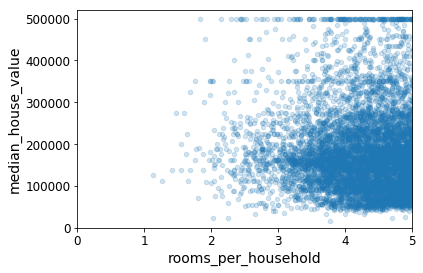

In [37]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])

In [38]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,populations_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# [3. Prepare the Data for Machine Learning Algorithms](#Contents)

Let's separate the predictors from the labels

In [39]:
housing = strat_train_set.drop('median_house_value', axis = 'columns')
housing_labels = strat_train_set['median_house_value'].copy()

## [3.1 Data Cleaning](#Contents)

As said before, we have some missing values in the **total_bedrooms** column

3 ways to deal with missing values:
* Get rid of the corresponding rows with dropna()
* Get rid of the whole attribute or column with drop()
* Set the missing values to some value(0, mean, median,...)

In [40]:
sample_incomplete_rows = housing[housing.isnull().any(axis = 'columns')].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [41]:
sample_incomplete_rows.dropna(subset = ['total_bedrooms']) #option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [42]:
sample_incomplete_rows.drop('total_bedrooms', axis = 'columns')  #option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [43]:
median = housing['total_bedrooms'].median()
sample_incomplete_rows.fillna(median, inplace=True)

In [44]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


For the 3rd option, we can also use the **Imputer** class form *sklearn*

In [45]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

Since the median can only be computed on numerical attributes, we need to create a
copy of the data without the text attribute ocean_proximity:

In [46]:
housing_num = housing.drop('ocean_proximity', axis = 1)

Now we can fit the imputer instance to the training data using fit() method

In [47]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [48]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

That's the median of each attribute, we can verify it with this

In [49]:
housing_num.median().values  #.values to convert it to numpy array

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

## [3.2 Transformation Pipelines](#Contents)

After  adding  "rooms_per_household" and  "population_per_household" columns, we'll replace missing values 
Then, we'll need to scale our feature using **StandardScaler**.
To finish we'll have to encode the categorical Variables with **LabelBinarizer**. Let's write a function that do all that and return a dataframe with all numerical variables scaled and without missing values and the categorical variable encoded

In [50]:
# creating my own pipeline 
def transform_data(data):
    #importing package
    from sklearn.preprocessing import Imputer
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import LabelBinarizer
    
    #separating numerical data and categorical data
    data_num = data.drop('ocean_proximity', axis = 1)
    data_cat = data['ocean_proximity']
    
    #adding "rooms_per_household", "population_per_household" columns
    data_num['rooms_per_household'] = data_num['total_rooms'] / data_num['households']
    data_num['population_per_household'] = data_num['population'] / data['households']
    
    #transforming numerical data by handling missing values 
    imputer = Imputer(strategy='median')
    X = imputer.fit_transform(data_num)
    
    #...and scaling with Standard scaling
    std_scaler = StandardScaler()
    Scaled = std_scaler.fit_transform(X)
    data_num_tr = pd.DataFrame(Scaled,columns=data_num.columns, index= list(data.index.values) )
    
    #Encoding Categorical data with LabelBinarizer
    encoder = LabelBinarizer()  #sparse_output = True  to get a sparse matrix
    data_cat_1hot = encoder.fit_transform(data_cat)
    data_encoded = pd.DataFrame(data_cat_1hot, columns = list(encoder.classes_), index = data_cat.index.values)
    
    #Concatenating the dataframes 
    data_prepared = pd.concat([data_num_tr, data_encoded], axis = 'columns')
    
    #return the data transformed
    return data_prepared



Now, let's use our function to get the prepared version of our training set 

In [51]:
housing_prepared = transform_data(housing)
housing_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,1,0,0,0,0
18632,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,1,0,0,0,0
14650,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0,0,0,0,1
3230,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,0,1,0,0,0
3555,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,1,0,0,0,0


In [52]:
housing_prepared.shape

(16512, 15)

# [4. Select and train a Model](#Contents)

## [4.1. Training and Evaluating on the training set](#Contents)

The good news is that thanks to all these previous steps, things are now going to be
much simpler from now on. Let’s first train a Linear Regression model

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels) #lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

we now have a working Linear Regression model. Let’s try it out on a few
instances from the training set

In [54]:
some_data = housing_prepared.iloc[:5]
some_labels = housing_labels.iloc[:5]
#some_data_prepared = transform_data(some_data)
some_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,1,0,0,0,0
18632,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,1,0,0,0,0
14650,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0,0,0,0,1
3230,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,0,1,0,0,0
3555,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,1,0,0,0,0


In [55]:
print('Predictions: \t', lin_reg.predict(some_data))
#predicted = lin_reg.predict(some_data_prepared.values)


Predictions: 	 [211888.26540421 321274.25149998 210853.46010112  62261.10820843
 194921.76527689]


In [56]:
print('Labels:\t', list(some_labels))

Labels:	 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Let’s measure this regression model’s RMSE on the whole
training set using Scikit-Learn’s mean_squared_error function

In [57]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68911.7605423384

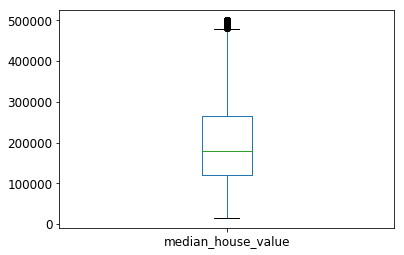

In [58]:
housing_labels.plot(kind='box')

most districts’
median_housing_values range between 120,000 and 265,000, so a typical prediction
error of 68,911 is not very satisfying. This is an example of a model underfitting
the training data.

Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding
complex nonlinear relationships in the data

In [59]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Now that the model is trained, let's evaluate it on the training set

In [60]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

No error? Could this model be the perfect one?. Not sure. This certainly is an overfiting problem. How can we be sure, knowing that, we must not touch the test set until we're ready to launch a model we're confident about.

## [4.2 Better Evaluation using Cross-Validation](#Contents)

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

Scikit-Learn cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a negative
value), which is why the preceding code computes -scores
before calculating the square root.

Let's look at the results:

In [62]:
def display_scores(scores):
    print('Scores: ', scores)
    print('\nMean', scores.mean())
    print('\nStandard deviation', scores.std())

display_scores(tree_rmse_scores)

Scores:  [69095.80051423 69553.91908943 70431.94282768 70397.98113717
 70835.02841073 73902.01331697 71746.91396427 70870.02154058
 76556.34466969 67799.75253832]

Mean 71118.97180090833

Standard deviation 2374.845682166679


Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform
worse than the Linear Regression model! The decision tree has a score of 71425, generally +/- 2367 

Let's compute the same scores for the linear regression model

In [63]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [67461.9308165  67232.2484863  68224.22888082 74716.58955656
 68420.26897488 71610.91469695 65201.58349349 68686.9304607
 72262.5140762  68112.28697795]

Mean 69192.94964203317

Standard deviation 2674.144726597016


That's right: The Decision Tree model is overfitting so badly that it performs worse than the linear regression model

Let's try one last model: the RandomForestRegressor

In [64]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_mse = np.sqrt(forest_mse)
forest_mse

22596.262139168564

In [65]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [50814.54966717 49525.98145337 52013.46422458 55078.99025664
 51373.31442157 56716.66627892 52313.97230352 50073.02207013
 55317.75983926 52528.67442835]

Mean 52575.639494350915

Standard deviation 2267.8478658108816


this is much better: Random Forests look very promising. However, note that
the score on the training set is still much lower than on the validation sets, meaning
that the model is still overfitting the training set.

# [5. Fine tune your model](#Contents)

## [5.1. Grid Search](#Contents)

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

The best hyperparameter combinaison can be found like this 

In [67]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [68]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [69]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65052.11484554499 {'max_features': 2, 'n_estimators': 3}
55368.13043043385 {'max_features': 2, 'n_estimators': 10}
52736.8766621369 {'max_features': 2, 'n_estimators': 30}
58640.40842527973 {'max_features': 4, 'n_estimators': 3}
52379.92747762705 {'max_features': 4, 'n_estimators': 10}
49903.91702394643 {'max_features': 4, 'n_estimators': 30}
58076.0608399897 {'max_features': 6, 'n_estimators': 3}
51649.61748594686 {'max_features': 6, 'n_estimators': 10}
49649.71941016075 {'max_features': 6, 'n_estimators': 30}
57463.51881474477 {'max_features': 8, 'n_estimators': 3}
51540.345516526846 {'max_features': 8, 'n_estimators': 10}
49776.78751833077 {'max_features': 8, 'n_estimators': 30}
62720.64961854877 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54536.61423536438 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60329.74197746971 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51883.762473279865 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In this example, we obtain the best solution by setting the max_features hyperparameter
to 6, and the n_estimators hyperparameter to 40. The RMSE score for this
combination is 49,698, which is slightly better than the score you got earlier using the default hyperparameter values (which was 52,807).

## [5.2. Randomized Search](#Contents)

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000253C557CDA0>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000253C557CCC0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [71]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48678.84228525442 {'max_features': 7, 'n_estimators': 180}
50381.32344687099 {'max_features': 5, 'n_estimators': 15}
50041.749246696425 {'max_features': 3, 'n_estimators': 72}
49795.71877227247 {'max_features': 5, 'n_estimators': 21}
48853.58929933428 {'max_features': 7, 'n_estimators': 122}
50024.42192577782 {'max_features': 3, 'n_estimators': 75}
49977.37116845575 {'max_features': 3, 'n_estimators': 88}
48869.50583223844 {'max_features': 5, 'n_estimators': 100}
49869.852075018585 {'max_features': 3, 'n_estimators': 150}
62132.98659280653 {'max_features': 5, 'n_estimators': 2}


In [72]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

better results for the RMSE (14678)

## [5.3. Analyze the Best Models and Their Errors](#Contents)

In [73]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([7.84244454e-02, 7.24317252e-02, 4.35879388e-02, 1.75742511e-02,
       1.65846711e-02, 1.70297662e-02, 1.64660275e-02, 3.65446117e-01,
       8.17995462e-02, 1.11928073e-01, 9.55264017e-03, 1.62386643e-01,
       8.31418544e-05, 3.20817448e-03, 3.49683950e-03])

Let’s display these importance scores next to their corresponding attribute names:

In [74]:
features = list(housing_prepared.columns)
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [75]:
sorted(zip(feature_importances,features), reverse= True)

[(0.3654461173026625, 'median_income'),
 (0.1623866425849517, 'INLAND'),
 (0.11192807264803414, 'population_per_household'),
 (0.08179954621581069, 'rooms_per_household'),
 (0.0784244454078027, 'longitude'),
 (0.0724317251843439, 'latitude'),
 (0.043587938792170704, 'housing_median_age'),
 (0.017574251083627288, 'total_rooms'),
 (0.017029766196714986, 'population'),
 (0.01658467108554444, 'total_bedrooms'),
 (0.016466027488271397, 'households'),
 (0.009552640171219026, '<1H OCEAN'),
 (0.0034968395005622235, 'NEAR OCEAN'),
 (0.0032081744838927395, 'NEAR BAY'),
 (8.314185439160122e-05, 'ISLAND')]

With this information, we may want to try dropping some of the less useful features
(e.g., apparently only one ocean_proximity category('INLAND') is really useful, so we could try
dropping the others).

## [5.4. Evaluate your system on the test set](#Contents)

In [76]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis='columns')
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = transform_data(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [77]:
final_rmse

65931.1020241699